In [25]:
# import data 
# data from Kaggle: https://www.kaggle.com/datasets/imdevskp/world-population-19602018
import pandas as pd
import numpy as np

df = pd.read_csv('population_total_long.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  12595 non-null  object
 1   Year          12595 non-null  int64 
 2   Count         12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


<AxesSubplot:xlabel='Year'>

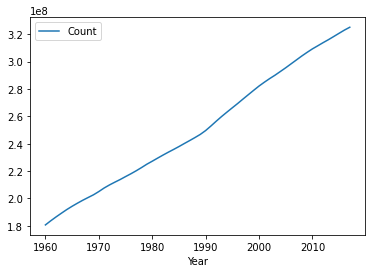

In [26]:
# select relevant columns & visualize population growth
df_us = df[(df['Country Name']=='United States')]
df_us = df_us.drop(columns=['Country Name'])
df_us.plot(x='Year',y='Count')

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.45e-69
Time:                        21:15:29   Log-Likelihood:                -942.01
No. Observations:                  58   AIC:                             1888.
Df Residuals:                      56   BIC:                             1892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.861e+09   4.35e+07   -111.858      0.0

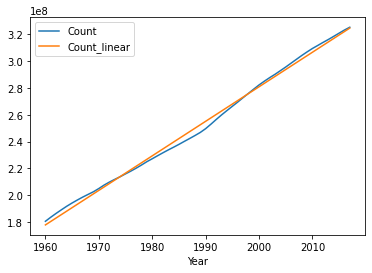

In [28]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

regression = sm.ols(data = df_us, formula='Count ~ Year').fit()
print(regression.summary())
df_us['Count_linear']=regression.fittedvalues

fig, ax = plt.subplots()
df_us.plot(x='Year',y='Count', ax = ax)
df_us.plot(x='Year',y='Count_linear', ax = ax)
plt.show()